

# Project: European Soccer - Project 2

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

From 2008 to 2016, this soccer dataset comes from kaggle and contains data from a large number of teams, players and matches from different leagues of many european countries. these datasets contain seven tables called: 'Country','League','Match','Player','Player Attributes','Team','Team Attributes'. and also have information about every player and team within each league.

### Questions for Analysis
We will discuss just 2 questions about these dataset in order to get useful insights beyond it.

1. Which players had the most penalties?
2. How is the relation between height of the player and his head_accuracy? and is height aquired by the teams?
3. What are the attributes that contribute to the players' overall rating?

In [3]:
# importing our libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Reading the data csv files into pandas dataframes

In [4]:
df_country = pd.read_csv('Database_Soccer/Country.csv',index_col ='id')
df_league = pd.read_csv('Database_Soccer/League.csv',index_col ='id')
df_match = pd.read_csv('Database_Soccer/Match.csv',index_col ='id')
df_player = pd.read_csv('Database_Soccer/Player.csv',index_col ='id')
df_player_att = pd.read_csv('Database_Soccer/Player_Attributes.csv',index_col ='id')
df_team = pd.read_csv('Database_Soccer/Team.csv',index_col ='id')
df_team_att = pd.read_csv('Database_Soccer/Team_Attributes.csv',index_col ='id')

### showing information on any table of the dataset you want to wrangle on

In [12]:
# function to get a glance into the dataset depending on the selected table
def glance_table(df):
    print("A Sample of the table")
    print("----------------")
    print(df.head())
    print()
    print("Dimensions of the table")
    print("----------------")
    print(df.shape)
    print()
    print("Columns on the table")
    print("----------------")
    print(df.columns)
    print()
    print("Duplicated rows or not")
    print("----------------")
    print(df.duplicated().sum())
    print()
    print("Null(missing) values or not")
    print("----------------")
    print(df.isnull().sum())
    

We have pandas dataframes called: **"df_country"**, **"df_league"**, **"df_match"**, **"df_player"**, **"df_player_att"**, **"df_team"**, **"df_team_att"**

In [13]:
# calling the function of wrangling process by seleceting dataframe
glance_table(df_country)

A Sample of the table
----------------
          name
id            
1      Belgium
1729   England
4769    France
7809   Germany
10257    Italy

Dimensions of the table
----------------
(11, 1)

Columns on the table
----------------
Index(['name'], dtype='object')

Duplicated rows or not
----------------
0

Null(missing) values or not
----------------
name    0
dtype: int64


Here with **Country Table**, we could see that it is just showing the countries of our dataset

In [14]:
glance_table(df_league)

A Sample of the table
----------------
       country_id                    name
id                                       
1               1  Belgium Jupiler League
1729         1729  England Premier League
4769         4769          France Ligue 1
7809         7809   Germany 1. Bundesliga
10257       10257           Italy Serie A

Dimensions of the table
----------------
(11, 2)

Columns on the table
----------------
Index(['country_id', 'name'], dtype='object')

Duplicated rows or not
----------------
0

Null(missing) values or not
----------------
country_id    0
name          0
dtype: int64


Here with **League Table**, it also holds the names of leagues

In [15]:
glance_table(df_player)

A Sample of the table
----------------
    player_api_id         player_name  player_fifa_api_id  \
id                                                          
1          505942  Aaron Appindangoye              218353   
2          155782     Aaron Cresswell              189615   
3          162549         Aaron Doran              186170   
4           30572       Aaron Galindo              140161   
5           23780        Aaron Hughes               17725   

               birthday  height  weight  
id                                       
1   1992-02-29 00:00:00  182.88     187  
2   1989-12-15 00:00:00  170.18     146  
3   1991-05-13 00:00:00  170.18     163  
4   1982-05-08 00:00:00  182.88     198  
5   1979-11-08 00:00:00  182.88     154  

Dimensions of the table
----------------
(11060, 6)

Columns on the table
----------------
Index(['player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

Duplicated rows or not


Here with **Player Table**, we see just basic information about each player

In [16]:
glance_table(df_team)

A Sample of the table
----------------
    team_api_id  team_fifa_api_id     team_long_name team_short_name
id                                                                  
1          9987             673.0           KRC Genk             GEN
2          9993             675.0       Beerschot AC             BAC
3         10000           15005.0   SV Zulte-Waregem             ZUL
4          9994            2007.0   Sporting Lokeren             LOK
5          9984            1750.0  KSV Cercle Brugge             CEB

Dimensions of the table
----------------
(299, 4)

Columns on the table
----------------
Index(['team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'], dtype='object')

Duplicated rows or not
----------------
0

Null(missing) values or not
----------------
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


Here with **Team Table**, it seems that this has basic info on teams as well

In [17]:
glance_table(df_match)

A Sample of the table
----------------
    country_id  league_id     season  stage                 date  \
id                                                                 
1            1          1  2008/2009      1  2008-08-17 00:00:00   
2            1          1  2008/2009      1  2008-08-16 00:00:00   
3            1          1  2008/2009      1  2008-08-16 00:00:00   
4            1          1  2008/2009      1  2008-08-17 00:00:00   
5            1          1  2008/2009      1  2008-08-16 00:00:00   

    match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
id                                                                     
1         492473              9987              9993               1   
2         492474             10000              9994               0   
3         492475              9984              8635               0   
4         492476              9991              9998               5   
5         492477              7947              9985

Here with **Match Table**, an important table having essential data about each match but wihg a huge amount of missing values

In [20]:
glance_table(df_player_att)

A Sample of the table
----------------
    player_fifa_api_id  player_api_id                 date  overall_rating  \
id                                                                           
1               218353         505942  2016-02-18 00:00:00            67.0   
2               218353         505942  2015-11-19 00:00:00            67.0   
3               218353         505942  2015-09-21 00:00:00            62.0   
4               218353         505942  2015-03-20 00:00:00            61.0   
5               218353         505942  2007-02-22 00:00:00            61.0   

    potential preferred_foot attacking_work_rate defensive_work_rate  \
id                                                                     
1        71.0          right              medium              medium   
2        71.0          right              medium              medium   
3        66.0          right              medium              medium   
4        65.0          right              medium      

Here with **Plyaer_Attributes Table**, it has a lot of missing values about important info on players

In [19]:
glance_table(df_team_att)

A Sample of the table
----------------
    team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
id                                                                         
1                434         9930  2010-02-22 00:00:00                60   
2                434         9930  2014-09-19 00:00:00                52   
3                434         9930  2015-09-10 00:00:00                47   
4                 77         8485  2010-02-22 00:00:00                70   
5                 77         8485  2011-02-22 00:00:00                47   

   buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
id                                                                         
1               Balanced                   NaN                    Little   
2               Balanced                  48.0                    Normal   
3               Balanced                  41.0                    Normal   
4                   Fast                   NaN  

Here with **Team_Attributes Table**, there is just one column with missing values and I think  we could ignore it totally since we will not need it in our analysis

## Data Cleaning

in order to clean our data, we should consider our questions that we had pointed it out, so that we could save our effort to set up the datasets just for our need

### Player Table 
we want to merge player_table and player_attributes together to make it easy for accessing by name

In [143]:
#combibing both datasets into just one
players = df_player.merge(df_player_att, on=['player_api_id','player_fifa_api_id'], how = "inner")

# A sample of the new dataset
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 45 columns):
player_api_id          183766 non-null int64
player_name            183766 non-null object
player_fifa_api_id     183766 non-null int64
birthday               183766 non-null object
height                 183766 non-null float64
weight                 183766 non-null int64
date                   183766 non-null object
overall_rating         183016 non-null float64
potential              183016 non-null float64
preferred_foot         183016 non-null object
attacking_work_rate    180622 non-null object
defensive_work_rate    183016 non-null object
crossing               183016 non-null float64
finishing              183016 non-null float64
heading_accuracy       183016 non-null float64
short_passing          183016 non-null float64
volleys                181139 non-null float64
dribbling              183016 non-null float64
curve                  181139 non-null float64
free_kic

In [142]:
#generate a subset for question 1
pen = players[["player_name","penalties"]]

#dropping duplicated values
pen = pen.drop_duplicates()

#dropping missing values
pen = pen.dropna()

#converting floating numbers into ints to be more consistent
pen.penalties = pen.penalties.astype(int)

# A sample of our new subset
pen.head()

,player_name,penalties
0,Aaron Appindangoye,48
3,Aaron Appindangoye,47
5,Aaron Cresswell,59
13,Aaron Cresswell,58
32,Aaron Cresswell,35


We will use this dataset then which is called **pen** (penalties) in our EDA process 

In [157]:
#generating a subset for question 2
height = pd.DataFrame(df_player[["player_name","height"]])

#inserting the heading_rating into our subset
height.insert( column='heading',value=players.heading_accuracy,loc=2)

#removing any missing values
height = height.dropna()

#removing any duplicated data
height = height.drop_duplicates()

#converting the floats into ints to be more clear .. the float parts don't matter here like in **height**
height.height = height.height.astype(int)
height.heading = height.heading.astype(int)

# A sample of our new subset
height.head()

,player_name,height,heading
id,,,
1,Aaron Appindangoye,182,71
2,Aaron Cresswell,170,71
3,Aaron Doran,170,70
4,Aaron Galindo,182,70
5,Aaron Hughes,182,58


In [75]:
#showing the names of columns in our new dataset of players 
players.dtypes

player_api_id            int64
player_name             object
player_fifa_api_id       int64
birthday                object
height                 float64
weight                   int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggressi

we want to extract **overall_rating** coloumn and some of essential performance attributes: **crossing**,**long_passing**,**stamina**,**positioning**,**ball_control**,**shot_power**,**sprint_speed**,**dribbling**,**finishing**,**strength**.

In [144]:
#generate a subset for question 3
corr = players[["player_name","overall_rating","crossing","long_passing","stamina","positioning","ball_control","shot_power","sprint_speed","dribbling","finishing","strength"]]

#dropping duplicated values
corr = corr.drop_duplicates()

#dropping missing values
corr = corr.dropna()

#converting floating numbers into ints to be more consistent
corr[["crossing","long_passing","stamina","positioning","ball_control","shot_power","sprint_speed","dribbling","finishing","strength"]]= corr[["crossing","long_passing","stamina","positioning","ball_control","shot_power","sprint_speed","dribbling","finishing","strength"]].astype(int)

# A sample of our new dataset
corr.head()

,player_name,overall_rating,crossing,long_passing,stamina,positioning,ball_control,shot_power,sprint_speed,dribbling,finishing,strength
0,Aaron Appindangoye,67.0,49,64,54,45,49,55,64,51,44,76
2,Aaron Appindangoye,62.0,49,64,54,45,49,55,64,51,44,76
3,Aaron Appindangoye,61.0,48,63,54,44,48,54,64,50,43,76
5,Aaron Cresswell,74.0,80,68,79,60,71,71,78,73,53,56
7,Aaron Cresswell,73.0,79,68,79,58,70,71,78,71,52,56


We will use this dataset then which is called **corr** (correalation) in our EDA process

<a id='eda'></a>
## Exploratory Data Analysis

### question 1: Which players had the most penalties?

In [77]:
# ordering the players as having most penalties
most_pen = pen.groupby(['player_name'])['penalties'].max().sort_values(ascending=False)
#showing first 20 players
top = pd.DataFrame(most_pen[:20])
top

,penalties
player_name,
Rickie Lambert,96
Mario Balotelli,95
Andrea Pirlo,95
Xavi Hernandez,95
Paul Scholes,95
Paolo Maldini,94
David Trezeguet,94
Fabio Cannavaro,94
Roy Makaay,94


### question2: How is the relation between height of the player and his head_accuracy?

Here, we have our dataset of **heading** label

In [158]:
height.head()

,player_name,height,heading
id,,,
1,Aaron Appindangoye,182,71
2,Aaron Cresswell,170,71
3,Aaron Doran,170,70
4,Aaron Galindo,182,70
5,Aaron Hughes,182,58


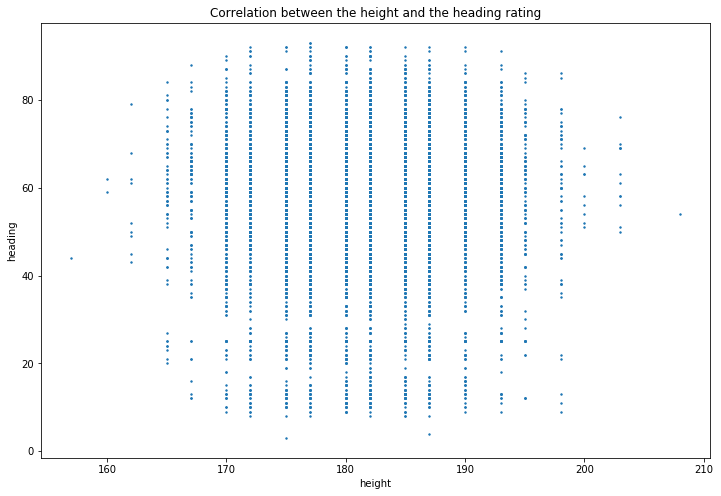

In [166]:
# showing the relation between the heading and height of the player
height.plot.scatter(x= 'height', y= 'heading', title = 'Correlation between the height and the heading rating', figsize=(12,8), s=2);


Text(0.5,1,'distribution of heights of the players in teams')

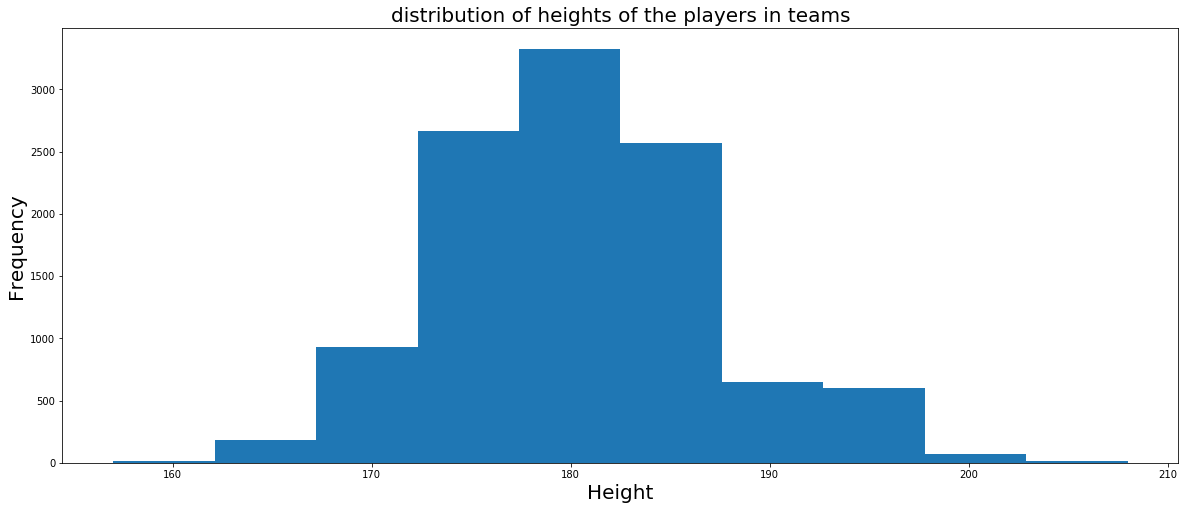

In [190]:
height.height.plot(kind='hist', figsize=(20,8));
plt.ylabel('Frequency', size = 20)
plt.xlabel('Height', size = 20)
plt.title('distribution of heights of the players in teams', size=20)

WOW!! its **Normal Distribution** 

### question 3: What are the attributes that contribute to the players' overall rating?

In [95]:
# a function to draw scatter plot between each attribute and the overall rating of the player
def scat(k):
    corr.plot(x=k,y = 'overall_rating',kind = 'scatter',figsize=(12,8),s = 2,title = 'Correlation between overall_rating and {}'.format(k))
    plt.ylabel('overall_rating')
    plt.xlabel(k)

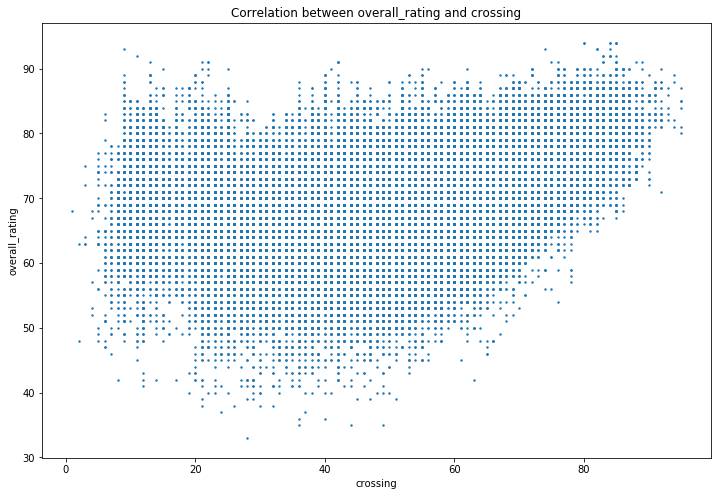

In [96]:
scat('crossing')

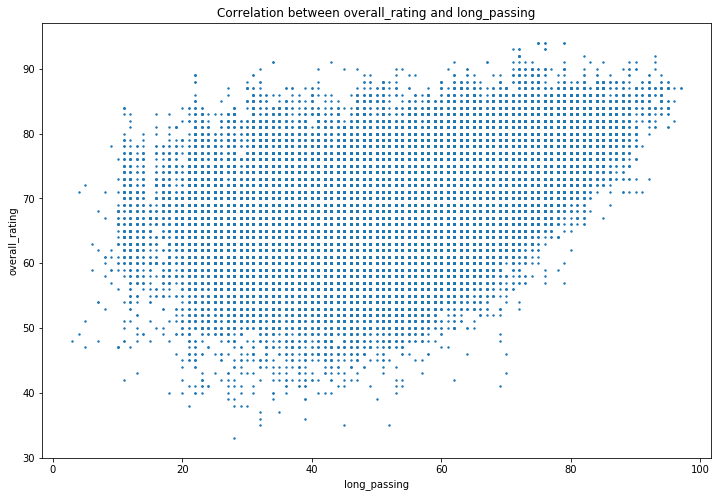

In [97]:
scat('long_passing')

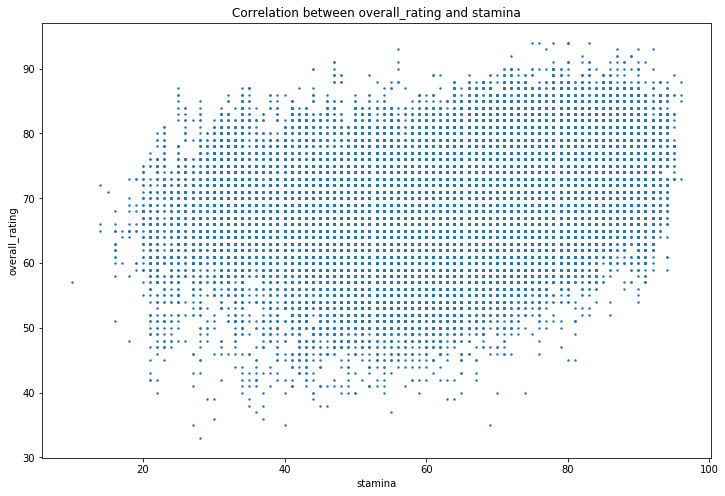

In [98]:
scat("stamina")

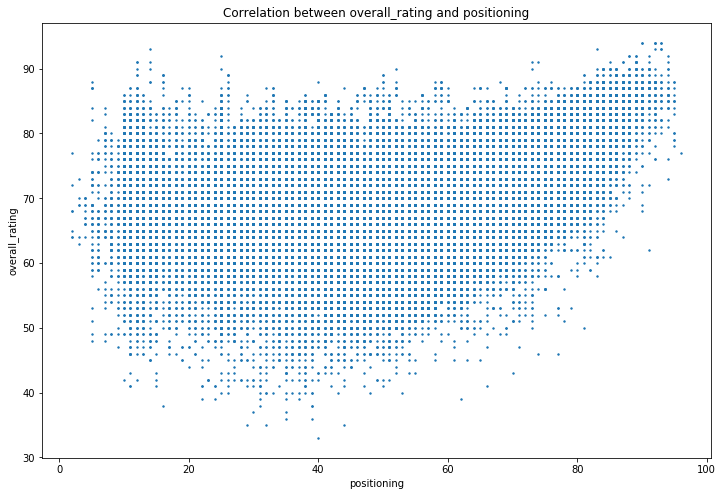

In [191]:
scat('positioning')

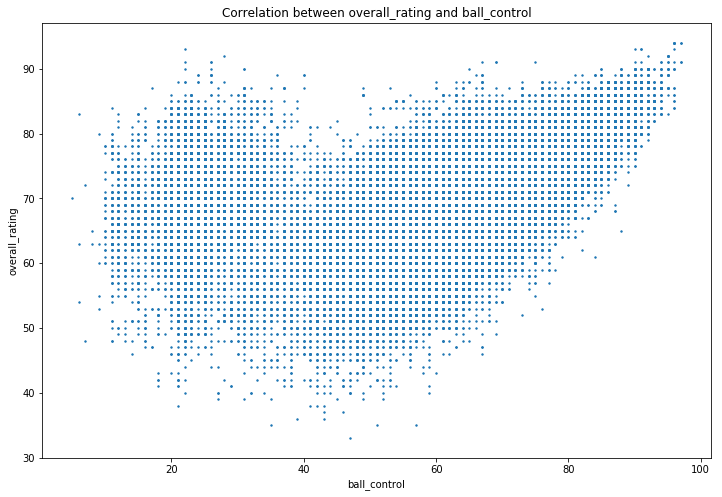

In [100]:
scat('ball_control')

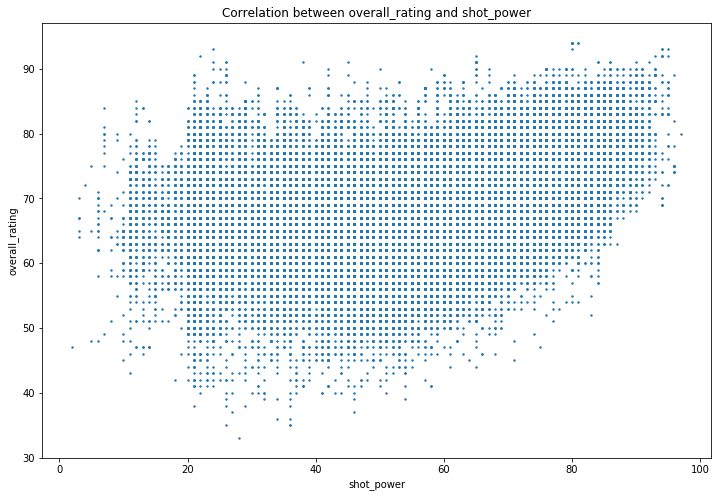

In [101]:
scat('shot_power')

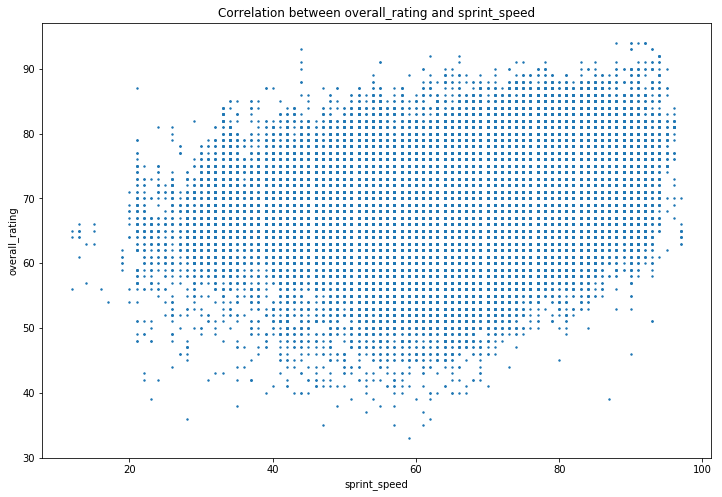

In [102]:
scat('sprint_speed')

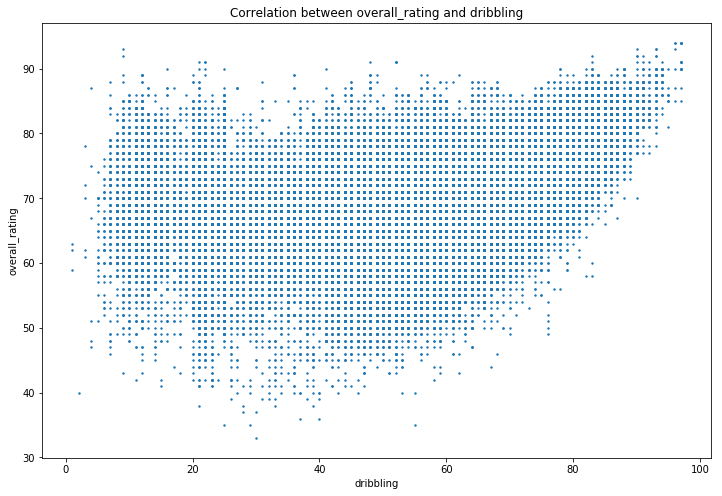

In [103]:
scat('dribbling')

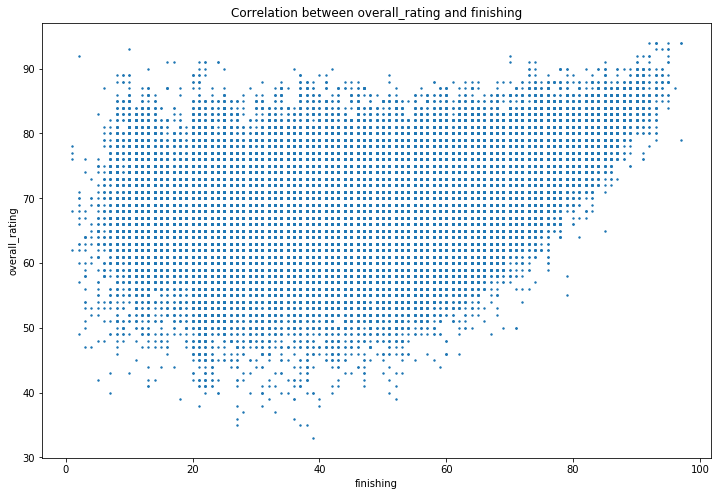

In [104]:
scat('finishing')

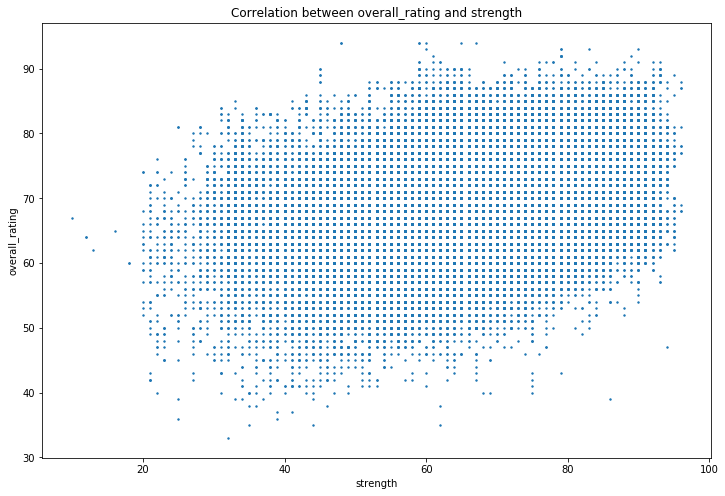

In [105]:
scat('strength')

<a id='conclusions'></a>
## Conclusions

### Limitations
> I found that the players' names are duplicated a lot so I had to remove all of the duplicates when I did already EDA processes with that table considereing that it didn't affect the analysis accuracy

> I found that there were huge number of missing values in the player_attributes table which I dropped them not to negatively affect the analysis

> finding some missing values while creating a set of heights and heading properties of the players, so I removed them 

### Summary 

> There are converging between the most penalties had by the players i.e, the most 20 players had penalties in a range of 96 to 93 penalty. By the way, we found out that **Rickie Lambert**, **Mario Balotelli**, **Xavi Hernandez**, and **Andrea Pirlo** are the most penalty-having in general.

> **finishing**,**dribbling**,**shot_power**,**ball_control**,**positioning**,**crossing**, and **long_passes** are the most positively correlated with overall_rating of players in general and I believe that this is logical because they are all essential attrubites which have a big effect on the result of the match as well as player's rating in that match 

> There is no correlation between the heading and the height of the players which means that its not necessary for being good-header is to be tall!

> It is now normal and clear that we could say that the disrtibution of the heights over the teams is exactly normal distribution which means teams don't tend to sign tall players